# Analysis of Suicide by State in Relation to Multiple Risk Factors

By: Matthewos Gashaw, Joseph Jubilee, Jacob Lane & Trevor Lorin

### Introduction

According to the World Health Organization, more than 700,000 people die each year from suicide. Suicide is a tragic occurrence that happens in all sorts of areas around the world and is a global phenomenon. Many different things factor into what may cause a person to attempt suicide or be at risk for attempting suicide. The World Health Organization cites a prior suicide attempt as the most important risk factor for suicide. Acknowledging that someone is at risk and getting them proper help is key to suicide prevention. In order to help aid in suicide prevention, it is important to be able to identify all kinds of different risk factors. The World Health Organization webpage for suicide facts contains more in-depth information on known suicide risk factors and prevention. 

Previous studies have revealed known risk factors such as a family history of mental health problems, being part of a group that experiences societal discrimination, a diagnosis of a mental disorder, and the largest known risk: a previous suicide attempt. The use of data science can help us determine how other lesser-known lifestyle factors have an effect on suicide rates. Examining other factors such as average household income in the area of residence, average sunlight hours, and the prevalence of firearms can help give insight into what weighs more into an increase in suicides. Comparing these less obvious factors' effects to known factors like depression and alcoholism will show if these factors truly affect suicide. Following through the data science lifecycle with suicide data can help provide statistical data on what factors into being at higher risk for suicide.

Why is This Important?

Studying what has a larger effect on suicide rates can help prevent further deaths by suicide. Suicide is a preventable cause of death, and gaining a better understanding of what leads people to be at risk can help organizations better utilize their preventative resources. Data proving that certain areas may be at a higher risk for suicide can help focus mental health services in those regions. A general knowledge of what puts a person at higher risk also helps individuals seek better resources for themselves and their peers. The data from this tutorial may help determine using risk factors the likelihood a person is at risk for suicide and can help with better suicide prevention.

### Purpose

The purpose of this tutorial is to provide a relevant example to guide readers through the data science lifecycle. The data science lifecycle is comprised of 5 stages: Data Collection, Data Processing, Exploratory Analysis and Data Visualization, Model Analysis, and Interpretation. In this tutorial, we will navigate through all 5 stages to demonstrate how data scientists draw conclusions from messy and seemingly unrelated data sets. Understanding what factors into suicide is extremely important for saving lives. Data science can allow for a better understanding of the risk of suicide and what can be done moving forward for more effective prevention. This tutorial demonstrates how data science can be applied to help provide insight into serious matters with results that can be used to make effective changes to make a positive change.

### Data Collection

For this first step in the data science lifecycle, the data itself has to be acquired along with the tools that will be used for or data science process. We will be using the language Python to process the data since Python contains many useful libraries for the different steps of the data science lifecycle. Here we begin our code by importing all the necessary libraries.

In [1]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# data collection
import numpy as np
import pandas as pd
import re
import random

# plotting graphs and the map of every country
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
!pip install statsmodels
from statsmodels.formula.api import ols

# machine learning and filling in missing data
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cluster import KMeans

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


For each new CSV file being read into a DataFrame, the new data frame is then left merged by state into the first data frame containing suicide rates per state. If column names need to be renamed, this is also done while merging the DataFrames.

In this tutorial, we are using CSV files containing suicide rates by state along with other variables that may be risk factors by state. The CSV files used for this tutorial can be downloaded from the sites below.

https://worldpopulationreview.com/state-rankings/suicide-rates-by-state

https://worldpopulationreview.com/state-rankings/average-temperatures-by-state

https://worldpopulationreview.com/state-rankings/guns-per-capita

https://worldpopulationreview.com/state-rankings/average-family-income

https://worldpopulationreview.com/state-rankings/income-inequality-by-state

https://worldpopulationreview.com/state-rankings/state-densities

https://worldpopulationreview.com/state-rankings/sunniest-states

https://www.kff.org/other/state-indicator/distribution-by-age

https://worldpopulationreview.com/state-rankings/marriage-rate-by-state

https://worldpopulationreview.com/state-rankings/alcohol-consumption-by-state

https://worldpopulationreview.com/state-rankings/median-age-by-state

https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm

In this next code block, we use the Pandas library to read the CSV files containing the different data we will be processing. We take each CSV file and read it into a Pandas DataFrame to cleanly store the data in a usable format. Pandas documentation can be found here for further reading.

In [3]:
suicideDf = pd.read_csv("suicide-rate-unadjusted-by-state.csv")

familyIncomeDf = pd.read_csv("median-income-by-state.csv")[['state','FamiliesMedianIncome']]

sunlightDf = pd.read_csv("hours-of-sunlight-by-state.csv")[['state', 'averageAnnualSunlight']]

giniIncomeDf = pd.read_csv("income-gini-coefficient-by-state.csv")[['state','giniCoefficient']]

tempDf = pd.read_csv("average-temp-by-state.csv")[['state', 'AverageTemperature']]

ageDf = pd.read_csv("median-age-by-state.csv")[['state', 'MedianAge']]

alcDf = pd.read_csv("alcohol-consumption-by-state.csv")[['state','alcoholConsumptionGallons']]

gunsDf = pd.read_csv("guns-per-capita-by-state.csv")[['state', 'gunsRegistered']]

marriageDf = pd.read_csv("marriage_by_state.csv")[['state', 'Married']]

anxdepDf = pd.read_csv("anxiety-depression-by-state.csv")

### Data Processing

For this second step of the data science lifecycle, the data must be processed and cleaned so it can be used for analysis and modeling. Raw data files are often not in a clean format and must be processed to be properly used.

Formatting the DataFrame

To prepare the data for analysis and modeling, the data should all be contained in one DataFrame. The suicide-by-state CSV has extra columns containing data unnecessary for our analysis purposes. Hence, we begin our data processing by only grabbing the three columns from that DataFrame that we need: state, population, and suicide rate. Then to put all the data in one DataFrame, we left merge all of the other DataFrames on the state. This results in the one suicide DataFrame now containing all the observations from the other DataFrames.

For the age DataFrame, before we merged the contents we had to rename the location column to "state" to merge the two DataFrames on that column.

In [4]:
suicideDf = suicideDf[['state', 'pop2023', 'suicideRate']]

suicideDf = suicideDf.merge(ageDf, how='left', on='state')

suicideDf = suicideDf.merge(familyIncomeDf, how='left', on='state')

suicideDf = suicideDf.merge(sunlightDf, how='left', on='state')

suicideDf = suicideDf.merge(giniIncomeDf, how='left', on='state')

suicideDf = suicideDf.merge(tempDf, how='left', on='state')

suicideDf = suicideDf.merge(gunsDf, how='left', on='state')

suicideDf = suicideDf.merge(alcDf, how='left', on='state')

suicideDf = suicideDf.merge(marriageDf, how='left', on='state')

To process the data from the CDC, we start by grabbing the needed columns from the DataFrame. The data originally had rows for each time period recorded, so we grouped by the state and indicator columns to take a mean over all the time periods for each state and type of data. We then use the pivot method to take the data types in the "Indicator" column and make them each their own column, with the average percentage of people reporting those symptoms over time as the values under that column. We then chose to just select the percentage of people reporting symptoms of depression as that is what we chose to focus on.

In [5]:
# Processing CDC Suicide/Anxiety Data
anxdepDf = anxdepDf[anxdepDf['Group'] == 'By State'][['Indicator', 'State', 'Value', 'Phase']]
# Group by state and average the percentages over all time periods reported
anxdepDf = anxdepDf.groupby(by=['State', 'Indicator']).agg(func='mean').reset_index()
anxdepDf = anxdepDf.pivot(index='State', columns='Indicator', values='Value')
anxdepDf.reset_index(inplace=True)
anxdepDf.rename(columns={'State':'state', 'Symptoms of Depressive Disorder': 'PercentDepression'}, inplace=True)
anxdepDf = anxdepDf[['state','PercentDepression']]

suicideDf = suicideDf.merge(anxdepDf, how='left', on='state')

In [6]:
suicideDf.head(10)

,state,pop2023,suicideRate,MedianAge,FamiliesMedianIncome,averageAnnualSunlight,giniCoefficient,AverageTemperature,gunsRegistered,alcoholConsumptionGallons,Married,PercentDepression
0,Wyoming,583279,32.3,38.0,81290,4471.0,43.00,42.3,132806,2.78,54.3,21.976786
1,Montana,1139507,32.0,40.1,72773,3847.0,45.87,42.6,22133,3.10,52.0,21.767857
2,Alaska,732984,30.8,34.6,92648,NaN,41.74,28.1,15824,2.85,49.2,24.432143
3,New Mexico,2110011,25.0,38.1,62611,5642.0,48.00,54.5,97580,2.26,43.9,26.603571
4,South Dakota,923484,23.2,37.2,77042,4332.0,44.00,45.8,21130,2.87,51.4,19.532143
5,Colorado,5868555,22.8,36.9,92752,4960.0,45.90,46.3,92435,2.88,49.8,23.250000
6,Oklahoma,4048375,22.1,36.7,67511,4912.0,46.52,60.4,71269,1.85,49.0,27.250000
7,Nevada,3209142,21.5,38.2,74077,5296.0,45.00,51.1,76888,3.42,45.7,27.748214
8,North Dakota,780588,20.8,35.2,86798,3925.0,46.00,41.1,13272,3.16,52.4,20.489286
9,Arkansas,3063152,20.6,38.3,62067,4725.0,47.00,61.1,79841,1.78,49.7,27.108929


Dealing with Missing Values

In the average annual sunlight column for Alaska and Hawaii, there are missing values. These values are considered to be missing at random and will require imputation to continue data analysis. To impute these values we are going to use a function of average temperature since sunlight and temperature are interrelated values. 

For our imputation, we are utilizing the K nearest neighbors imputer from the sklearn library. We are setting k equal to two and then are fitting the data between average annual sunlight and average temperature. We then are going to use the imputed values to replace the missing data for average annual sunlight.

In [7]:
imp = KNNImputer(n_neighbors=2)
imp.fit(suicideDf[['averageAnnualSunlight', 'AverageTemperature']])
imputed = imp.transform(suicideDf[['averageAnnualSunlight', 'AverageTemperature']])
suicideDf['averageAnnualSunlight'] = imputed[:,0]

Displayed below is the final processed DataFrame containing all the cleaned data. This DataFrame will be used for analysis and to create a machine-learning model in the later steps of the data science lifecycle.

In [8]:
suicideDf.head(10)

,state,pop2023,suicideRate,MedianAge,FamiliesMedianIncome,averageAnnualSunlight,giniCoefficient,AverageTemperature,gunsRegistered,alcoholConsumptionGallons,Married,PercentDepression
0,Wyoming,583279,32.3,38.0,81290,4471.0,43.00,42.3,132806,2.78,54.3,21.976786
1,Montana,1139507,32.0,40.1,72773,3847.0,45.87,42.6,22133,3.10,52.0,21.767857
2,Alaska,732984,30.8,34.6,92648,3946.5,41.74,28.1,15824,2.85,49.2,24.432143
3,New Mexico,2110011,25.0,38.1,62611,5642.0,48.00,54.5,97580,2.26,43.9,26.603571
4,South Dakota,923484,23.2,37.2,77042,4332.0,44.00,45.8,21130,2.87,51.4,19.532143
5,Colorado,5868555,22.8,36.9,92752,4960.0,45.90,46.3,92435,2.88,49.8,23.250000
6,Oklahoma,4048375,22.1,36.7,67511,4912.0,46.52,60.4,71269,1.85,49.0,27.250000
7,Nevada,3209142,21.5,38.2,74077,5296.0,45.00,51.1,76888,3.42,45.7,27.748214
8,North Dakota,780588,20.8,35.2,86798,3925.0,46.00,41.1,13272,3.16,52.4,20.489286
9,Arkansas,3063152,20.6,38.3,62067,4725.0,47.00,61.1,79841,1.78,49.7,27.108929


### Exploratory Analysis / Data Visualization

For the next step in the data science lifecycle, we want to create visualizations of our datasets so that any trends between different factors relating to suicide can stand out and be observed. 

Exploratory Analysis of Suicide Rates Across States

To better understand the distribution of suicide rates across states, we can plot each of the suicide rates and rank them. As shown below, Wyoming has the highest suicide rate in the entire country, which is over triple the suicide rate of New Jersey, which has the lowest suicide rate in the country.

Text(0, 0.5, 'Suicide Rate')

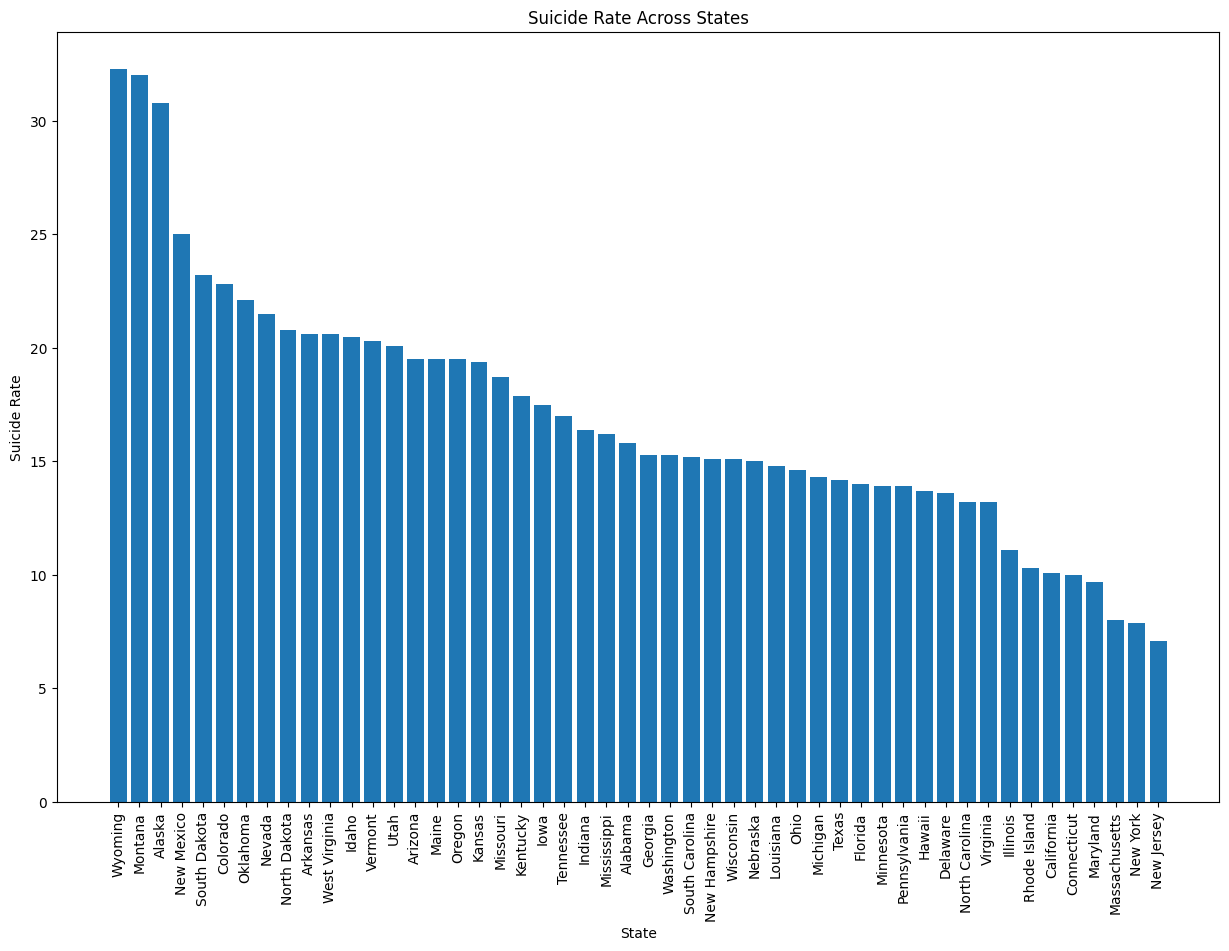

In [9]:
plt.figure(figsize=(15,10))
plt.bar(suicideDf['state'], suicideDf['suicideRate'])
#Label the graph
plt.xticks(suicideDf['state'], suicideDf['state'], rotation='vertical')
plt.title('Suicide Rate Across States')
plt.xlabel('State')
plt.ylabel('Suicide Rate')

Data Visualization of Suicide Rates vs Other Factors Across States

Using the matplot library, (documentation found here) we can create scatter plots to plot all 50 states' suicide rates compared to other state variables. We also want to add lines of regression on each of the scatter plots to aid us in indicating any correlations between state suicide rates and other state variables.

In the plots displayed below, we can already begin to see some (loose) patterns between the suicide rate and some of the state variables. According to the regression lines, population size, family median income, guns registered, and Gini coefficient are negatively correlated with the suicide rate across states and average annual sunlight, marriage rate, alcohol consumption, and percent depression are positively correlated with the suicide rate across states. This information will aid us in narrowing down the causes of a high suicide rate.

Text(0.5, 0, 'Percent Depression')

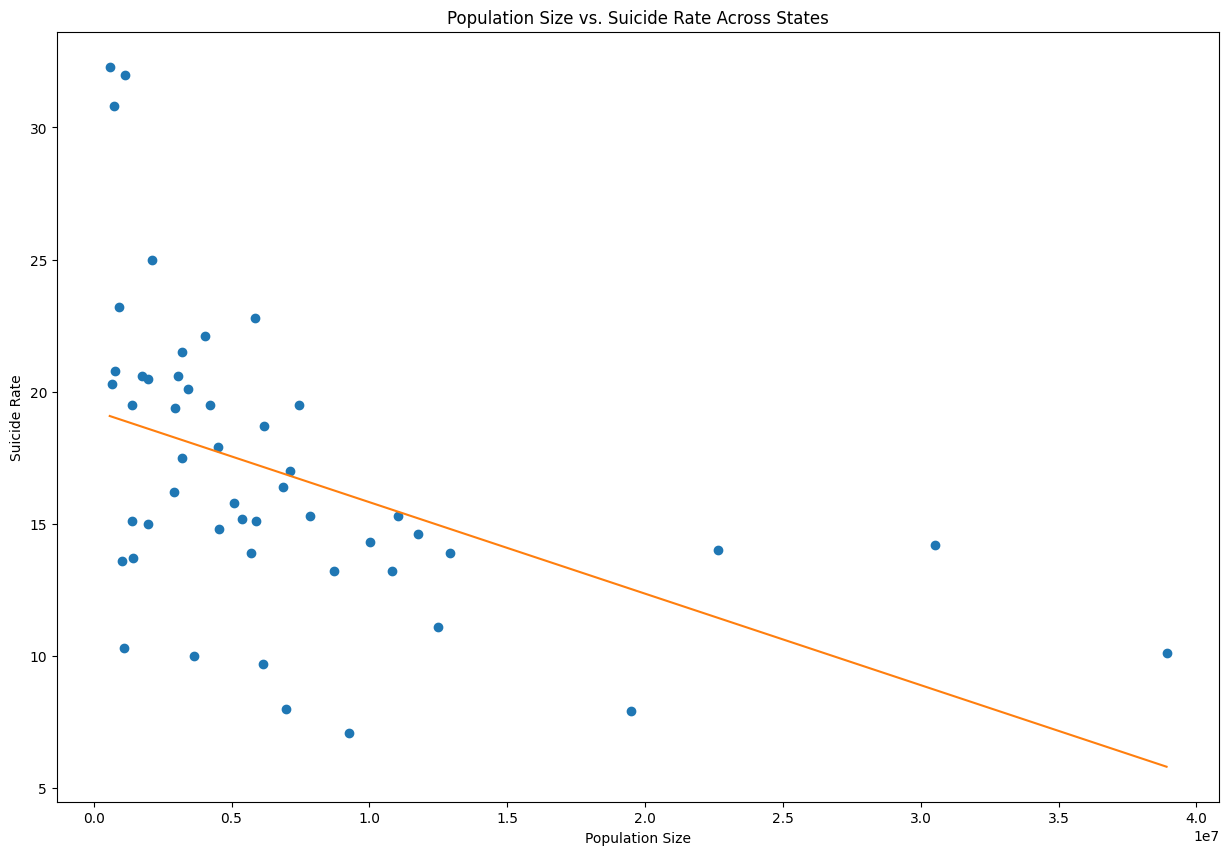

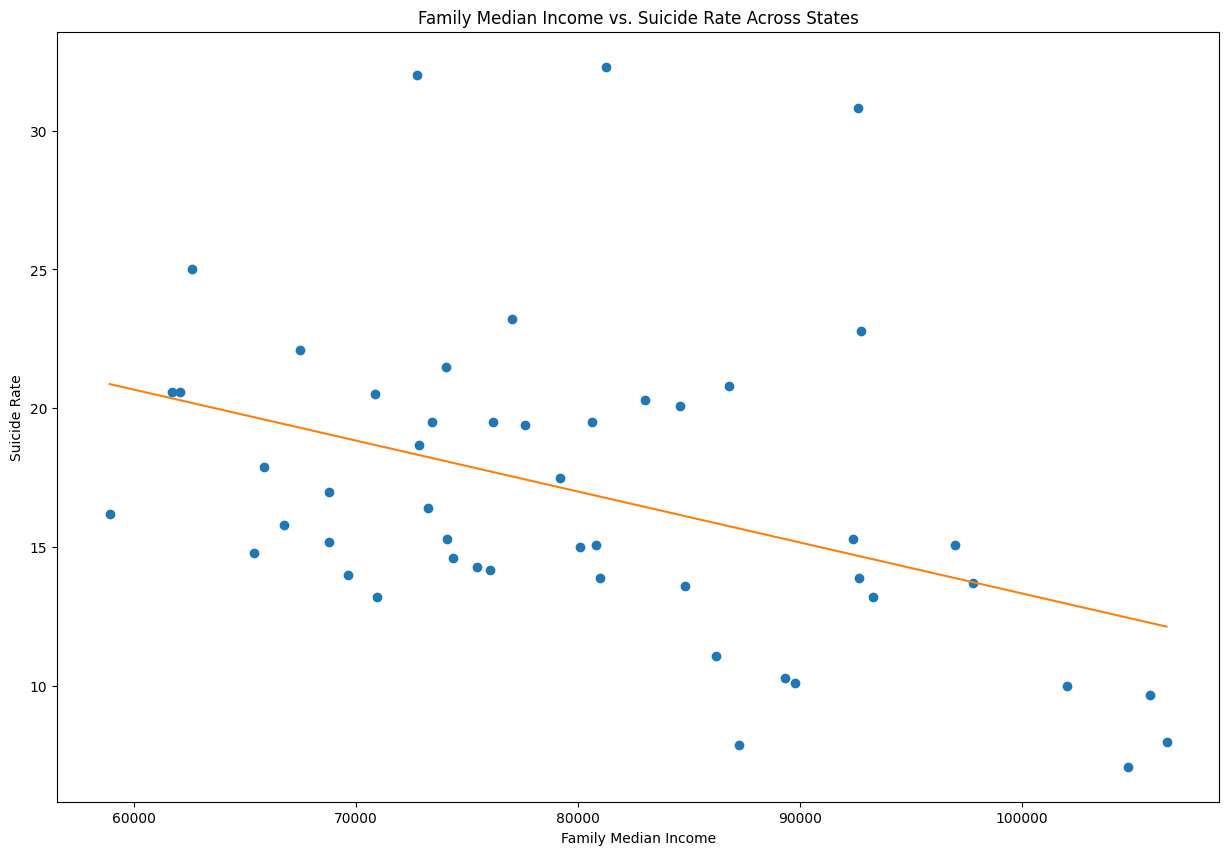

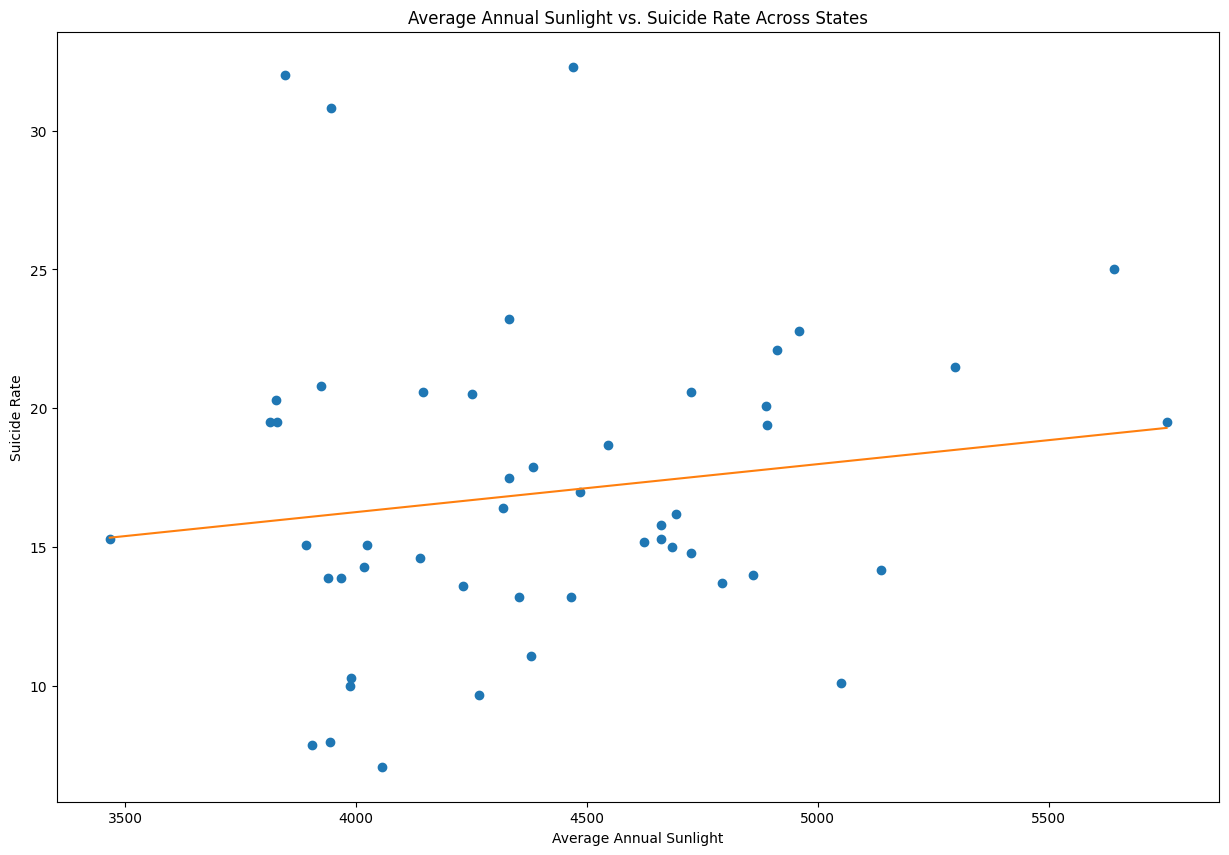

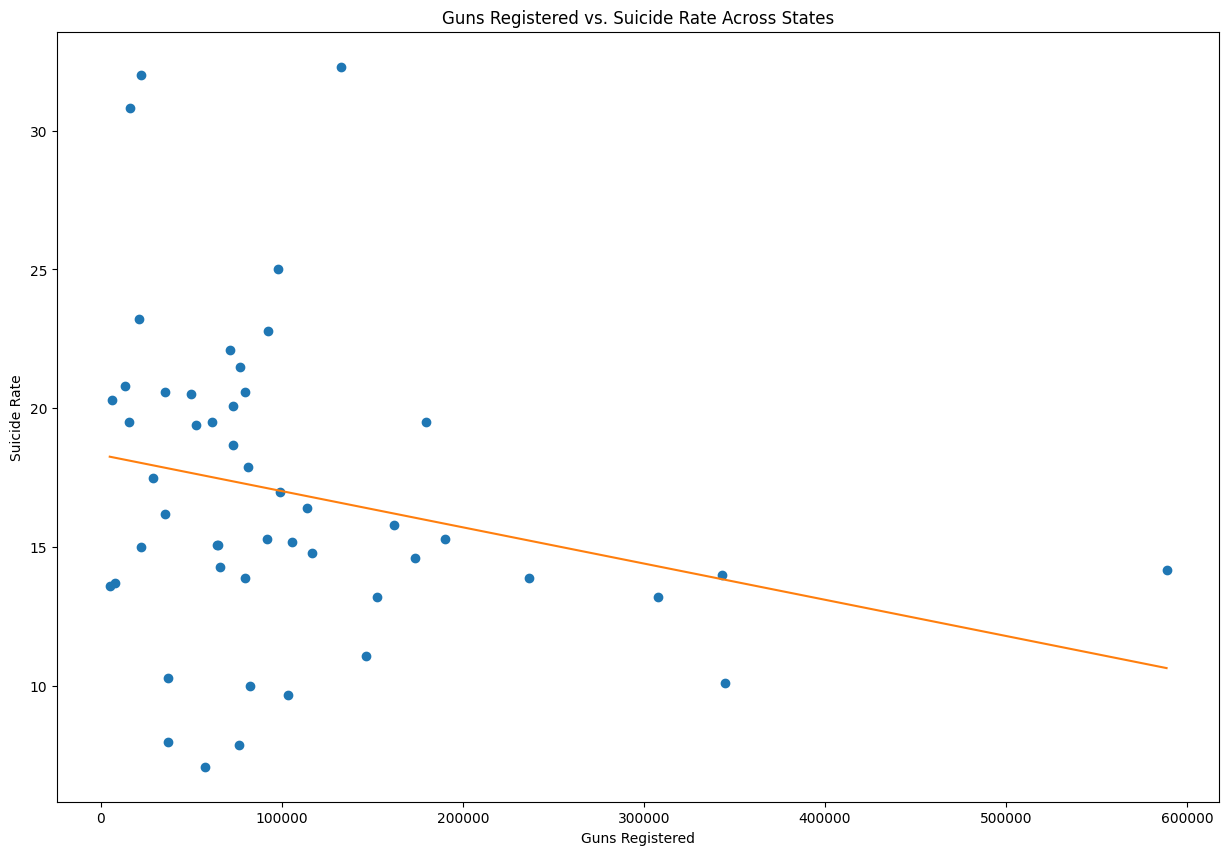

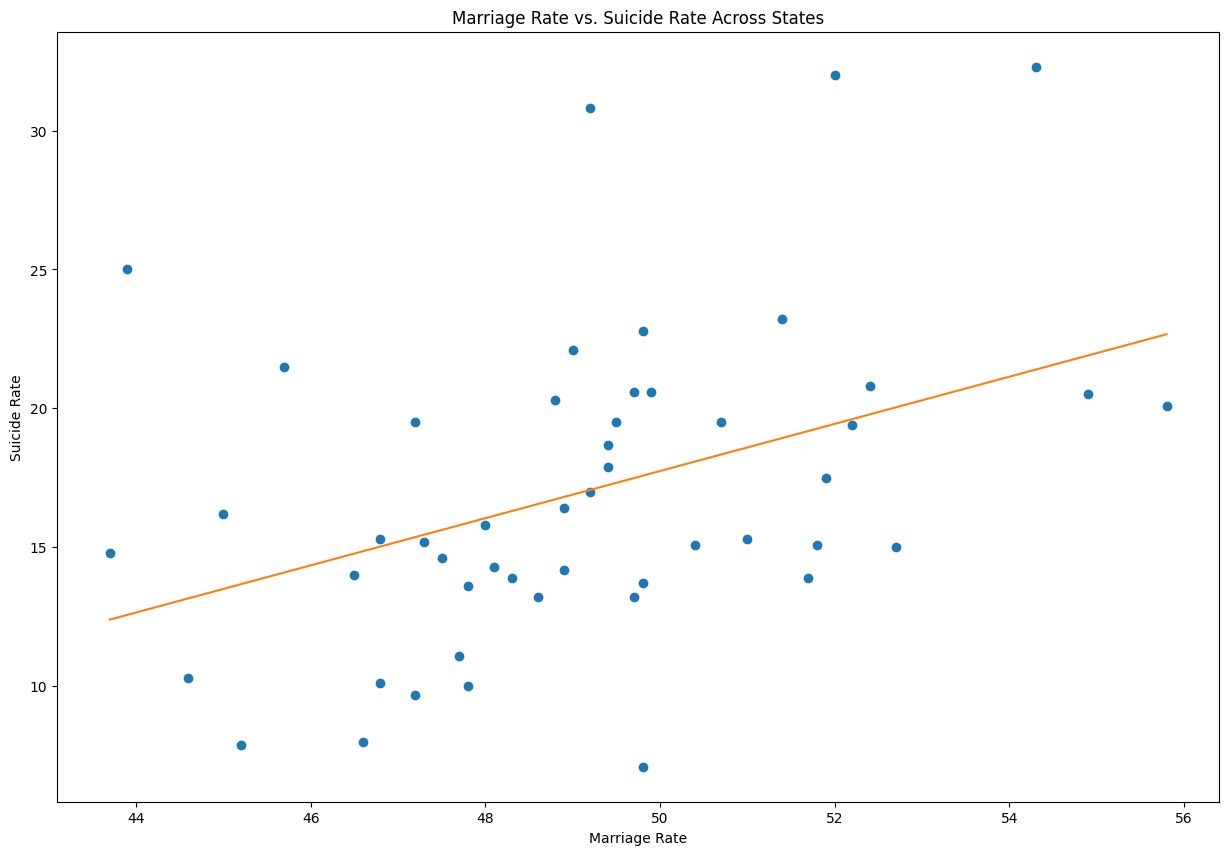

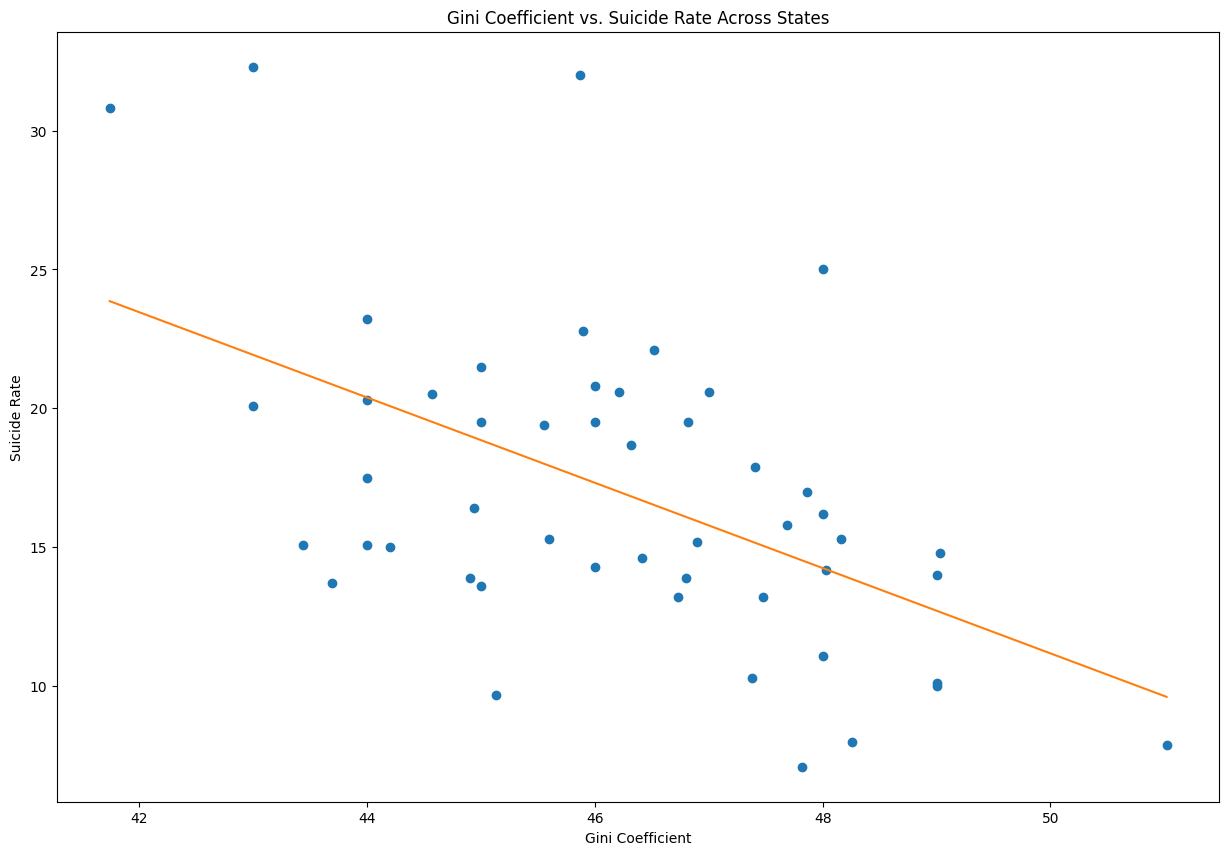

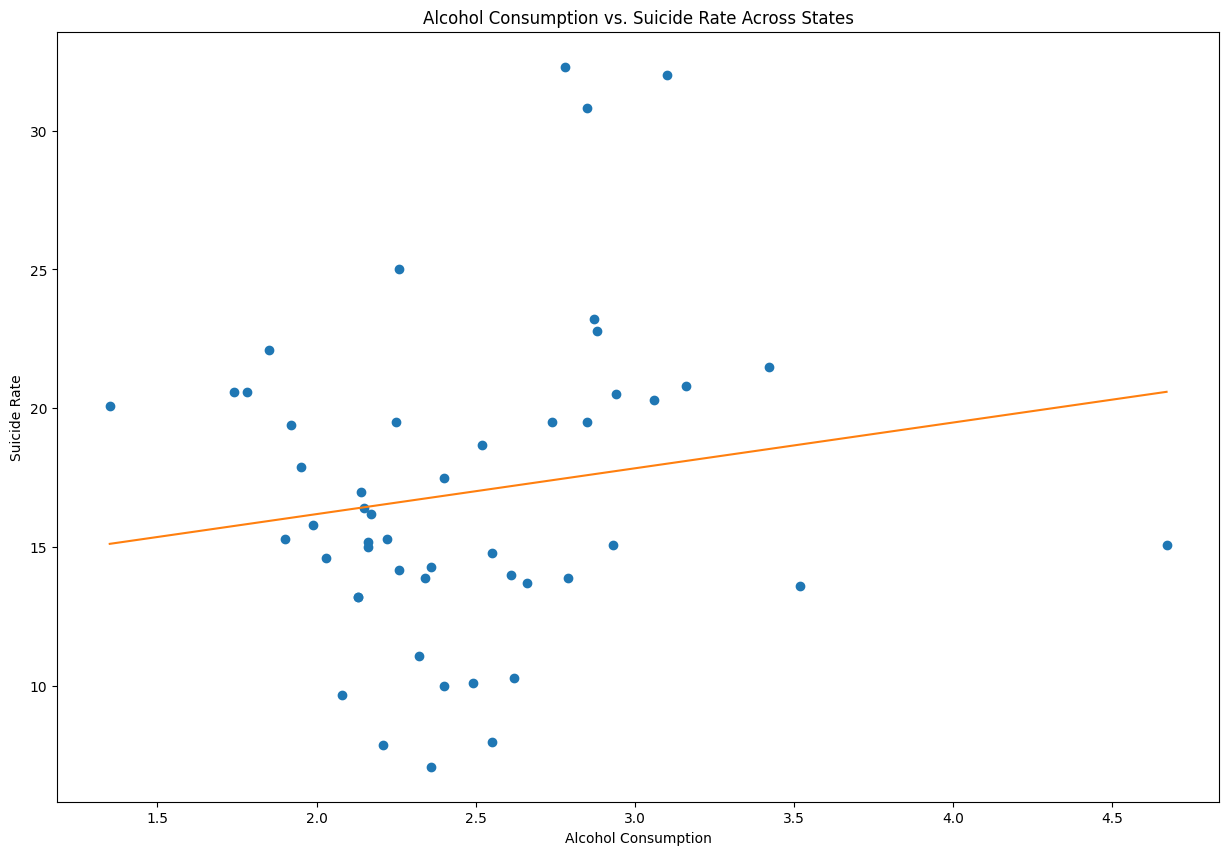

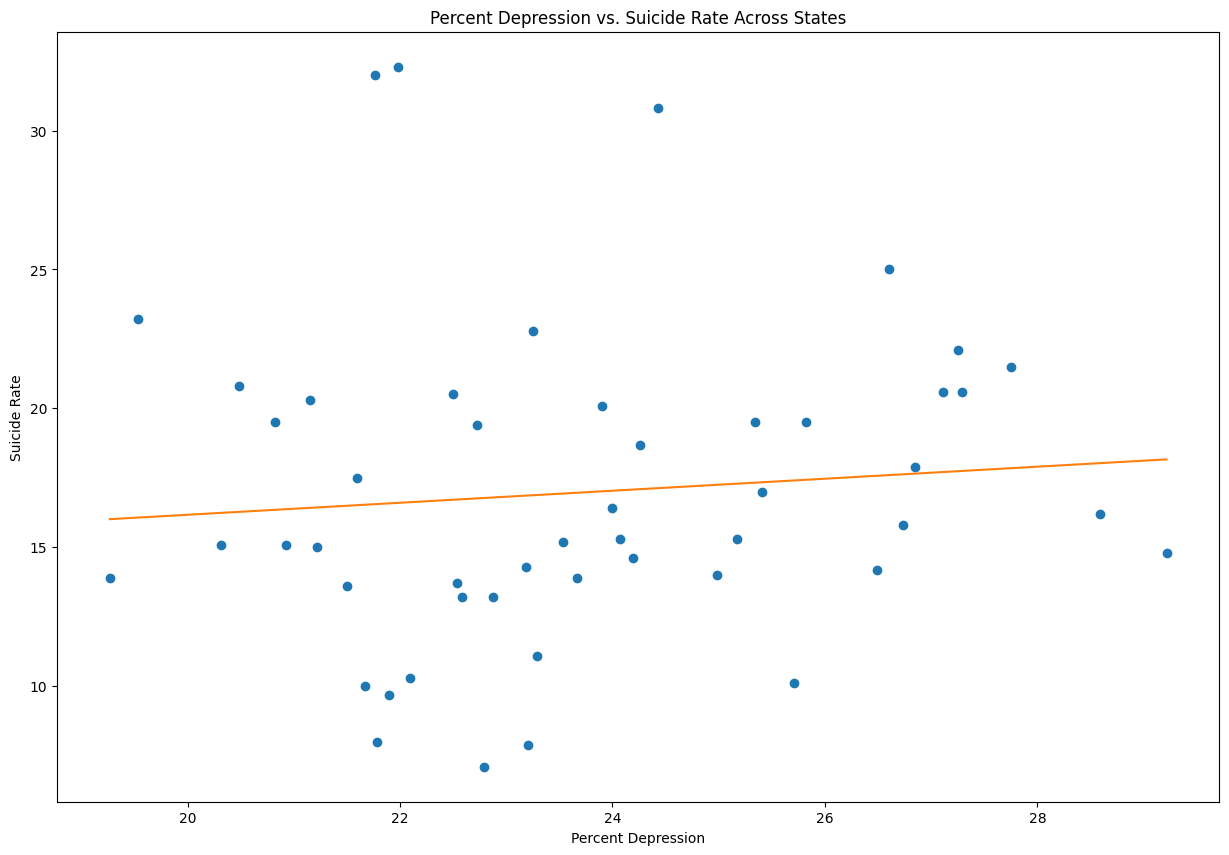

In [10]:
# Plot for Population Size vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['pop2023'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Population Size vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Population Size")

# Plot for Family Median Income vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['FamiliesMedianIncome'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Family Median Income vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Family Median Income")

# Plot for Average Annual Sunlight vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['averageAnnualSunlight'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Average Annual Sunlight vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Average Annual Sunlight")

# Plot for Guns Registered vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['gunsRegistered'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Guns Registered vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Guns Registered")

# Plot for Marriage Rate vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['Married'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Marriage Rate vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Marriage Rate")

# Plot for Gini Coefficient vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['giniCoefficient'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Gini Coefficient vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Gini Coefficient")

# Plot for Alcohol Consumption vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['alcoholConsumptionGallons'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Alcohol Consumption vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Alcohol Consumption")

# Plot for Percent Depression vs Suicide Rate
y = suicideDf['suicideRate'].values
x = suicideDf['PercentDepression'].values
# Make the plot with line of regression
z = np.polyfit(x, y, deg=1)
f = np.poly1d(z)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)
plt.figure(figsize=(15,10))
# Display chart with points and regression line
plt.plot(x, y,'o', x2, y2)
plt.title("Percent Depression vs. Suicide Rate Across States")
plt.ylabel("Suicide Rate")
plt.xlabel("Percent Depression")

We can expand more upon the data visualization by using statsmodel to calculate OLS regression results between the suicide rate and each of the other state variables. Using this information, we can determine the variables that have the highest correlations with the suicide rate. As shown below, the Gini coefficient has the largest slope intercept to the suicide rate compared to the other variables with a coefficient of 1.648573.

In [11]:
# Print regression summaries for each of the other state variables
print(ols(formula = 'suicideRate ~ pop2023', data = suicideDf).fit().params)
print(ols(formula = 'suicideRate ~ FamiliesMedianIncome', data = suicideDf).fit().params)
print(ols(formula = 'suicideRate ~ averageAnnualSunlight', data = suicideDf).fit().params)
print(ols(formula = 'suicideRate ~ gunsRegistered', data = suicideDf).fit().params)
print(ols(formula = 'suicideRate ~ Married', data = suicideDf).fit().params)
print(ols(formula = 'suicideRate ~ giniCoefficient', data = suicideDf).fit().params)
print(ols(formula = 'suicideRate ~ PercentDepression', data = suicideDf).fit().params)
print(ols(formula = 'suicideRate ~ alcoholConsumptionGallons', data = suicideDf).fit().params)

Intercept    1.928395e+01
pop2023     -3.462366e-07
dtype: float64
Intercept               31.684036
FamiliesMedianIncome    -0.000183
dtype: float64
Intercept                9.356124
averageAnnualSunlight    0.001728
dtype: float64
Intercept         18.324715
gunsRegistered    -0.000013
dtype: float64
Intercept   -24.706903
Married       0.849030
dtype: float64
Intercept          87.929813
giniCoefficient    -1.534966
dtype: float64
Intercept            11.843199
PercentDepression     0.216349
dtype: float64
Intercept                    12.897716
alcoholConsumptionGallons     1.648573
dtype: float64


### Model Analysis: Hypothesis Testing

When determining whether or not our state variables affect the suicide rate, our null hypothesis is that the given state variable does not affect the state's suicide rate. Our goal is to determine if we can reject this null hypothesis for any of the state variables.

After using the statsmodel to generate the OLS Regression results between suicide rate and each of the state variables shown below, we can see how related the two variables are through the p-values. Family median income and marriage rate both have p-values of 0.004, population size has a p-value of 0.001, and the Gini coefficient has a p-value of 0, which is less than 0.05, indicating to us that we can reject the null hypothesis and conclude that these variables potentially affect the suicide rate. Average annual sunlight, guns registered, depression percentage, and alcohol consumption have p-values of 0.122, 0.085, 0.521, and 0.266 respectively, which are all greater than 0.05, indicating to us that we cannot reject the null hypothesis that these variables do not affect the suicide rate.

In [12]:
print(ols(formula = 'suicideRate ~ pop2023', data = suicideDf).fit().summary())
print(ols(formula = 'suicideRate ~ FamiliesMedianIncome', data = suicideDf).fit().summary())
print(ols(formula = 'suicideRate ~ averageAnnualSunlight', data = suicideDf).fit().summary())
print(ols(formula = 'suicideRate ~ gunsRegistered', data = suicideDf).fit().summary())
print(ols(formula = 'suicideRate ~ Married', data = suicideDf).fit().summary())
print(ols(formula = 'suicideRate ~ giniCoefficient', data = suicideDf).fit().summary())
print(ols(formula = 'suicideRate ~ PercentDepression', data = suicideDf).fit().summary())
print(ols(formula = 'suicideRate ~ alcoholConsumptionGallons', data = suicideDf).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            suicideRate   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     12.89
Date:                Thu, 11 May 2023   Prob (F-statistic):           0.000773
Time:                        23:14:18   Log-Likelihood:                -150.89
No. Observations:                  50   AIC:                             305.8
Df Residuals:                      48   BIC:                             309.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2840      0.962     20.056      0.0

### Model Analysis: Machine Learning

In this next section of the tutorial, we want to utilize a machine learning algorithm to develop a model that could be applied to measure suicide rates in other population groups. 

Our first step is to further process the data by standardizing numerical columns. To do this we subtract each value from the mean and divide by the standard deviation. This should help reduce the impact of differences in units and variances between each feature we are including. More can be read about when it is important to standardize data here: https://builtin.com/data-science/when-and-why-standardize-your-data

In [13]:
suicideDf['pop2023'] =( suicideDf['pop2023'] - suicideDf['pop2023'].mean() ) / suicideDf['pop2023'].std()

suicideDf['suicideRate'] =( suicideDf['suicideRate'] - suicideDf['suicideRate'].mean() ) / suicideDf['suicideRate'].std()

suicideDf['MedianAge'] =( suicideDf['MedianAge'] - suicideDf['MedianAge'].mean() ) / suicideDf['MedianAge'].std()

suicideDf['averageAnnualSunlight'] =( suicideDf['averageAnnualSunlight'] - suicideDf['averageAnnualSunlight'].mean() ) / suicideDf['averageAnnualSunlight'].std()

suicideDf['giniCoefficient'] =( suicideDf['giniCoefficient'] - suicideDf['giniCoefficient'].mean() ) / suicideDf['giniCoefficient'].std()

suicideDf['AverageTemperature'] =( suicideDf['AverageTemperature'] - suicideDf['AverageTemperature'].mean() ) / suicideDf['AverageTemperature'].std()

suicideDf['gunsRegistered'] =( suicideDf['gunsRegistered'] - suicideDf['gunsRegistered'].mean() ) / suicideDf['gunsRegistered'].std()

suicideDf['alcoholConsumptionGallons'] =( suicideDf['alcoholConsumptionGallons'] - suicideDf['alcoholConsumptionGallons'].mean() ) / suicideDf['gunsRegistered'].std()

suicideDf['Married'] =( suicideDf['Married'] - suicideDf['Married'].mean() ) / suicideDf['Married'].std()

suicideDf['PercentDepression'] =( suicideDf['PercentDepression'] - suicideDf['PercentDepression'].mean() ) / suicideDf['PercentDepression'].std()

Shown below is an elbow plot of various numbers of k-means clusters, ranging from 1 to 9 clusters compared against their associated sum of squares error (SSE). We want to utilize the sum of squares error because it provides us with insight into how far elements are from their cluster centers. The lower sum of squares error is, the more accurate our clustering model will be. Our goal is to select a good number of clusters to work with so the number of clusters is minimized and the sum of squares error is minimized. In our case, we would want to use 3 or 4 clusters.

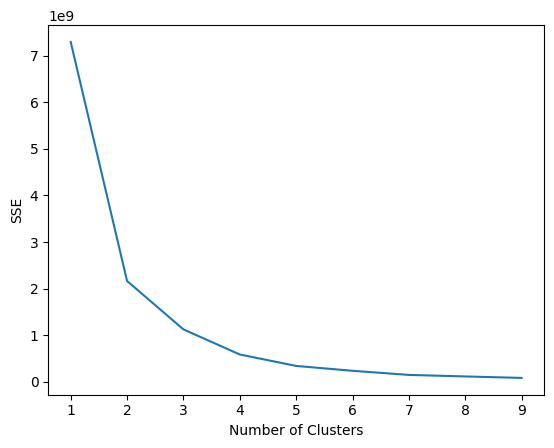

In [14]:
suicideDfClustering = suicideDf.drop(columns=['state'])
sse = [] #Sum of squares error
# Fit KMeans for # of clusters 1-10 and store the SSE
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(suicideDfClustering)
    suicideDfClustering["labels"] = kmeans.labels_
    sse.append(kmeans.inertia_)
plt.figure()
# Plot and elbow plot of SSE vs. Number of Clusters
plt.plot(range(1, 10), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Next, we plotted the clustered data for each pair of data we encountered to see how those pairs relate to our clustering. Here we can compare each feature pairwise to see how much the clustering was impacted by that feature. Most importantly, we can look at how the other features cluster in relation to the suicide rate. Visually, it looks like median income and Gini Coefficient (income inequality) show the clearest separation in relation to the suicide rate.

<Figure size 1400x1400 with 0 Axes>

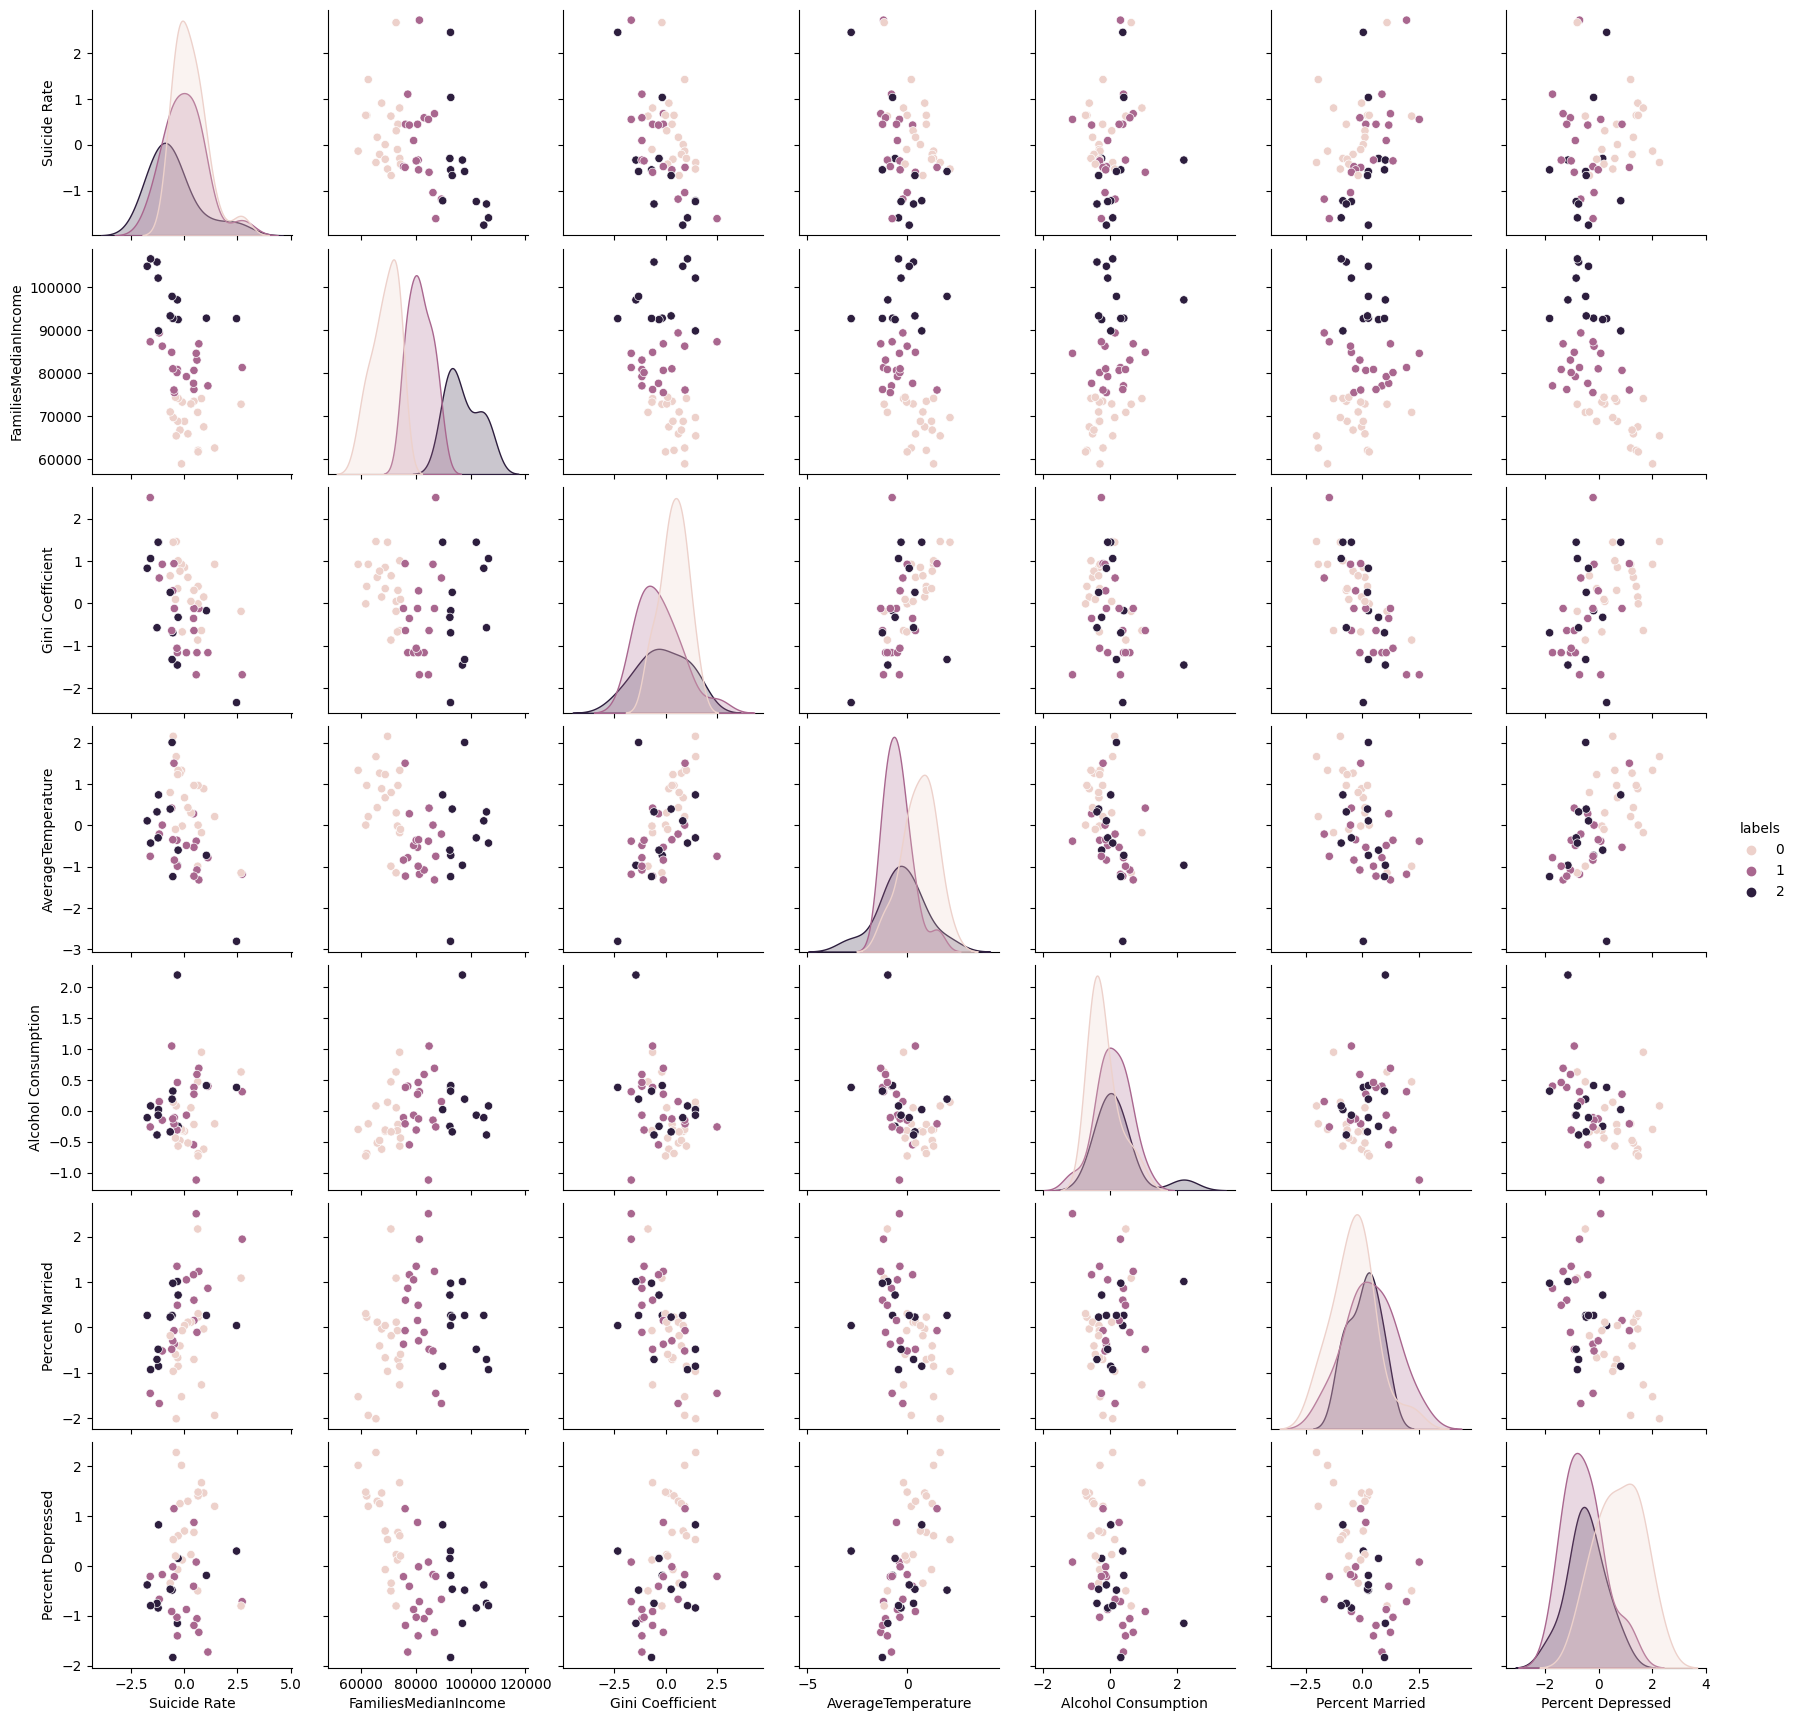

In [15]:
kmeans = KMeans(n_clusters=3).fit(suicideDfClustering)
suicideDfClustering['labels'] = kmeans.labels_

suicideDfClustering.rename(columns={
    'pop2023': '2023 Population',
    'suicideRate': 'Suicide Rate',
    'MedianAge': 'Median Age',
    'averageAnnualSunlight': 'Avg Annual Sunlight',
    'giniCoefficient': 'Gini Coefficient',
    'gunsRegistered': 'Guns Registered',
    'alcoholConsumptionGallons': 'Alcohol Consumption',
    'Married': 'Percent Married',
    'PercentDepression': 'Percent Depressed'
}, inplace=True)

suicideDfClustering.drop(columns=['2023 Population', 'Avg Annual Sunlight', 'Guns Registered', 'Median Age'], inplace=True)

plt.figure(figsize=(14,14))
sb.pairplot(suicideDfClustering, hue='labels')
plt.show()

We then trained a Random Forest Regression model on our data, which could then serve as a predictive model for suicide rate based on the other factors in our data set. Random Forest is a method of machine learning which generates many decision trees by randomly sampling the dataset with replacement. While a single decision tree is prone to overfitting the data, this random forest of trees is more likely to average out to an accurate prediction. We were interested in seeing the most important features as determined by this model, which we plotted below.

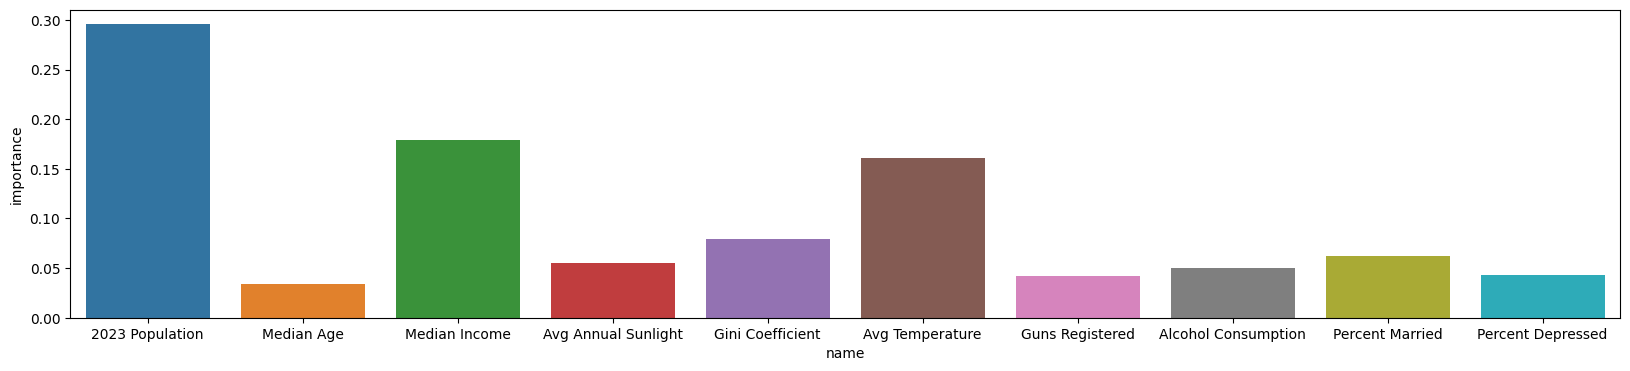

In [16]:
X = suicideDf.drop(columns=['state', 'suicideRate'])
y = suicideDf['suicideRate']

REG = RandomForestRegressor(n_estimators=100).fit(X = X, y = y)
featureImportance = pd.DataFrame()
featureImportance['name'] = REG.feature_names_in_
featureImportance['importance'] = REG.feature_importances_

featureImportance['name'] = featureImportance['name'].replace({
    'pop2023': '2023 Population',
    'suicideRate': 'Suicide Rate',
    'MedianAge': 'Median Age',
    'averageAnnualSunlight': 'Avg Annual Sunlight',
    'giniCoefficient': 'Gini Coefficient',
    'gunsRegistered': 'Guns Registered',
    'alcoholConsumptionGallons': 'Alcohol Consumption',
    'Married': 'Percent Married',
    'PercentDepression': 'Percent Depressed',
    'FamiliesMedianIncome': 'Median Income',
    'AverageTemperature': 'Avg Temperature'
})

plt.figure(figsize=(20,4))
sb.barplot(data = featureImportance, x = 'name', y = 'importance')
plt.show()

### Insight / Conclusion

This is the last part of the data science lifecycle. At this point, the data has been analyzed and now we can make some conclusions about the results.

From our data analysis, we found that the Gini coefficient was the factor that had the strongest correlation with suicide rates per state as the OLS regression results indicated a p-value of 0. The Gini coefficient has a negative relationship with the suicide rate meaning that the more income inequality there is, the lower the suicide rate. Another factor that had a strong correlation with the suicide rate per state was Family Median Income which had a p-value of 0.004. Family Median income has a negative relationship with the suicide rate meaning that the more money a family has, the lower their risk for suicide becomes. This could be because wealthier people have more access to mental health services and will therefore be less inclined to commit suicide.

The results of our machine-learning model indicated that population, median income, and average temperature were the strongest predictors of suicide rates. Most of the factors we analyzed were not strong predictors in the random forests model. Since so many things factor into what causes a person to choose to take their own life, this model may not have much use in predicting suicide rates on a state-wide scale.

We hope this tutorial helps better your understanding of the data science lifecycle and how it can be applied to better understand risk factors for suicide. For more information on some parts of the data science lifecycle check the following links:

Data Processing: https://www.tutorialspoint.com/basics_of_computer_science/basics_of_computer_science_data_processing.htm

Hypothesis Testing: https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/

Random Forests: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

Clustering in Machine Learning: https://www.geeksforgeeks.org/clustering-in-machine-learning/

If you are someone you know has experienced suicidal thoughts the 24/7 suicide and crisis hotline number is 988 or you can access the hotline's official website here. To learn more about suicide and its risk factors the CDC and the National Institute of Health have webpages providing facts on signs of suicide risk and tips for suicide prevention.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f897a4f-c89f-4357-9a14-4dcb3022704d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>